# Decomposition Analysis - US Construction Spending (2002-2014)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('ConstructionTimeSeriesDataV2.csv')
df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


# Public Sector Construction

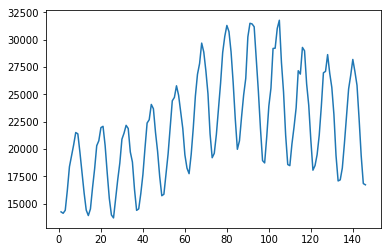

In [15]:
# first look
plt.plot(df.Month, df['Public Construction'])

Initial impressions:
- nonlinear overall trendline
- clear cyclicality, approximately every 10-15 months
- cycle amplitude increases slightly over time - unsure if significant

Approach:
1. model trend using a moving average
2. examine residual pattern, R1, after removing trend
3. find cycle period using autocorrelation, and model average cycle structure
4. create final model and calculate error

In [16]:
dfpub = df.drop(['Total Construction','Private Construction'], axis=1)
dfpub.head()

,Month,Month-Year,Public Construction
0,1,Jan-02,14243
1,2,Feb-02,14113
2,3,Mar-02,14386
3,4,Apr-02,16221
4,5,May-02,18375


### 1. Finding Trend Line

In [17]:
def sqErr(row):
    return (row['Public Construction'] - row['MovAvg'])**2

# initializing new columns
dfpub['MovAvg'] = np.NaN
dfpub['sqErr'] = np.NaN

# converting df index to date format
dfpub.index = pd.date_range(freq='M', start=pd.Timestamp(year=2002, month=1, day=1), periods=len(dfpub['Public Construction']))
dfpub.head()

,Month,Month-Year,Public Construction,MovAvg,sqErr
2002-01-31,1,Jan-02,14243,NaN,NaN
2002-02-28,2,Feb-02,14113,NaN,NaN
2002-03-31,3,Mar-02,14386,NaN,NaN
2002-04-30,4,Apr-02,16221,NaN,NaN
2002-05-31,5,May-02,18375,NaN,NaN


Average Squared Error per Month:  13581548.10100133
            Month Month-Year  Public Construction        MovAvg         sqErr
2003-07-31     19     Jul-03                20755  18050.486111  7.314395e+06
2003-08-31     20     Aug-03                21957  18058.000000  1.520220e+07
2003-09-30     21     Sep-03                22075  18084.916667  1.592077e+07
2003-10-31     22     Oct-03                20321  18126.152778  4.817354e+06
2003-11-30     23     Nov-03                17801  18170.000000  1.361610e+05
2003-12-31     24     Dec-03                15466  18235.500000  7.670130e+06
2004-01-31     25     Jan-04                13959  18309.166667  1.892395e+07
2004-02-29     26     Feb-04                13689  18376.958333  2.197695e+07
2004-03-31     27     Mar-04                15443  18444.611111  9.009669e+06
2004-04-30     28     Apr-04                17177  18502.000000  1.755625e+06
2004-05-31     29     May-04                18709  18554.736111  2.379735e+04
2004-06-30  

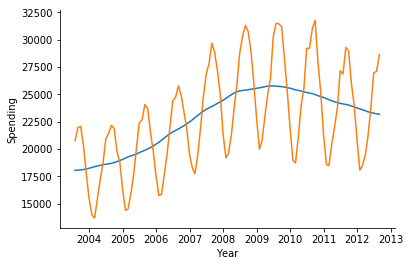

In [18]:
window = 36
window = window - window % 2

# loop computing the moving average
for i in range(int(window/2),dfpub.shape[0]-int(window/2)):
    dfpub.loc[dfpub.index[i],'MovAvg'] = (0.5*dfpub.iloc[i - int(window/2)]['Public Construction'] + dfpub.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*dfpub.iloc[i + int(window/2)]['Public Construction'])/float(window)

dfpub['sqErr'] = (dfpub['Public Construction'] - dfpub['MovAvg'])**2

# removing rows outside of window
dfpub.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(dfpub['MovAvg'],label='Moving Avg.')
ax.plot(dfpub['Public Construction'],label='Public Construction Spending')
ax.set_xlabel('Year')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(dfpub['sqErr'])/len(dfpub))
print(dfpub)

### 2. Examining R1

In [19]:
dfpub['R1'] = dfpub['Public Construction'] - dfpub['MovAvg']
dfpub['R1Error'] = abs((dfpub['Public Construction'] - dfpub['R1'])/dfpub['Public Construction'])
dfpub.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Month-Year,Public Construction,MovAvg,sqErr,R1,R1Error
2003-07-31 00:00:00,19,Jul-03,20755,18050.5,"7,314,395.4","2,704.5",0.870
2003-08-31 00:00:00,20,Aug-03,21957,18058.0,"15,202,201.0","3,899.0",0.822
2003-09-30 00:00:00,21,Sep-03,22075,18084.9,"15,920,765.0","3,990.1",0.819
2003-10-31 00:00:00,22,Oct-03,20321,18126.2,"4,817,354.3","2,194.8",0.892
2003-11-30 00:00:00,23,Nov-03,17801,18170.0,"136,161.0",-369.0,1.021
2003-12-31 00:00:00,24,Dec-03,15466,18235.5,"7,670,130.2","-2,769.5",1.179
2004-01-31 00:00:00,25,Jan-04,13959,18309.2,"18,923,950.0","-4,350.2",1.312
2004-02-29 00:00:00,26,Feb-04,13689,18377.0,"21,976,953.3","-4,688.0",1.342
2004-03-31 00:00:00,27,Mar-04,15443,18444.6,"9,009,669.3","-3,001.6",1.194
2004-04-30 00:00:00,28,Apr-04,17177,18502.0,"1,755,625.0","-1,325.0",1.077


Average Residual:  120.58522727272724


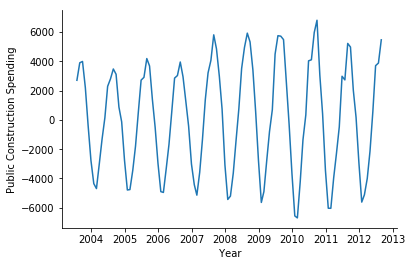

In [20]:
fig,ax = plt.subplots()
ax.plot(dfpub['R1'])
ax.set_xlabel(' Year')
ax.set_ylabel('Public Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(dfpub['R1'])/len(dfpub))

### 3. Examining cyclicality and autocorrelation analysis

In [21]:
maxCorr = 0.0
period = np.NaN
for i in range(1,20):
    corr = dfpub['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8486375316894602
Correlation, lag  2     0.4846195337567183
Correlation, lag  3     -0.007177248780703143
Correlation, lag  4     -0.49554892375973447
Correlation, lag  5     -0.8288179569669593
Correlation, lag  6     -0.9462777407123573
Correlation, lag  7     -0.8288579638039721
Correlation, lag  8     -0.48571061970010343
Correlation, lag  9     0.004997098591155971
Correlation, lag  10     0.4817646196968951
Correlation, lag  11     0.8389178942275625
Correlation, lag  12     0.9802446550357118
Correlation, lag  13     0.8361843883266434
Correlation, lag  14     0.4848265284305894
Correlation, lag  15     -0.003592213269114516
Correlation, lag  16     -0.48222336701850393
Correlation, lag  17     -0.8171150144686051
Correlation, lag  18     -0.9427534781166457
Correlation, lag  19     -0.8337051906400711
period =  12      Maximum Correlation =  0.9802446550357118


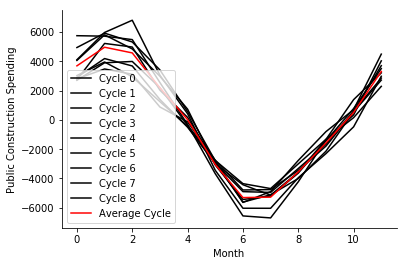

In [22]:
# looks like our cycle is 12 months, after all!
period = 12
cycleLen = period
numCycles = int(len(dfpub)/cycleLen + 0.5)
cycles = [dfpub.iloc[range(i*period,min((i+1)*period,len(dfpub)))]['R1'] for i in range(numCycles)]
ptsInCycles = [dfpub.iloc[range(i,len(dfpub['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Public Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

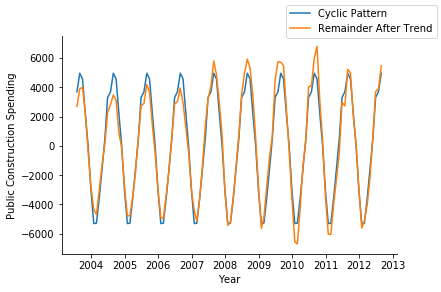

In [23]:
cycleLen = period
numCycles = int(len(dfpub)/cycleLen + 0.5)
dfpub['C'] = np.NaN   # initializes cyclicality component
for i in range(len(dfpub)):
    dfpub.loc[dfpub.index[i], 'C'] = avg[i % cycleLen]

fig,ax = plt.subplots()
ax.plot(dfpub['C'],label='Cyclic Pattern')
ax.plot(dfpub['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Public Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

### 4. Final Model/Calculating Error

In [24]:
dfpub['R2Public'] = dfpub['R1'] - dfpub['C']
dfpub['sqErr'] = dfpub['R2Public'] ** 2
dfpub['R2ErrorPublic'] = abs(dfpub['R2Public']/dfpub['Public Construction'])
dfpub['fit'] = dfpub['MovAvg'] + dfpub['C']
#dfpub.drop(['sqErr'],axis=1,inplace=True)
print('Average Error (Relative): ', sum(dfpub['R2ErrorPublic'])/len(dfpub))
print('Cumulative Squared Error ', sum(dfpub['sqErr']))
pd.set_option('display.width', 200)
print(dfpub[['Month-Year','MovAvg', 'C', 'fit', 'Public Construction', 'R2Public', 'sqErr', 'R2ErrorPublic']])

Average Error (Relative):  0.024999478035219624
Cumulative Squared Error  56909356.70856909
           Month-Year        MovAvg            C           fit  Public Construction     R2Public         sqErr  R2ErrorPublic
2003-07-31     Jul-03  18050.486111  3690.790278  21741.276389                20755  -986.276389  9.727411e+05       0.047520
2003-08-31     Aug-03  18058.000000  4961.773611  23019.773611                21957 -1062.773611  1.129488e+06       0.048402
2003-09-30     Sep-03  18084.916667  4573.222222  22658.138889                22075  -583.138889  3.400510e+05       0.026416
2003-10-31     Oct-03  18126.152778  2192.078704  20318.231481                20321     2.768519  7.664695e+00       0.000136
2003-11-30     Nov-03  18170.000000    16.300926  18186.300926                17801  -385.300926  1.484568e+05       0.021645
2003-12-31     Dec-03  18235.500000 -3046.260802  15189.239198                15466   276.760802  7.659654e+04       0.017895
2004-01-31     Jan-04  183

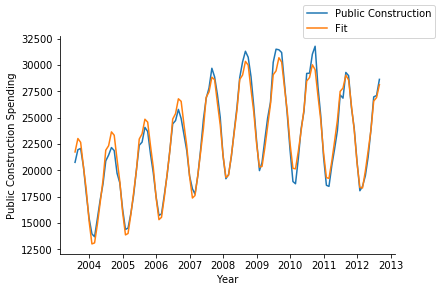

In [25]:
fig,ax = plt.subplots()
ax.plot(dfpub['Public Construction'],label='Public Construction')
ax.plot(dfpub['fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Public Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

# Private Sector Construction

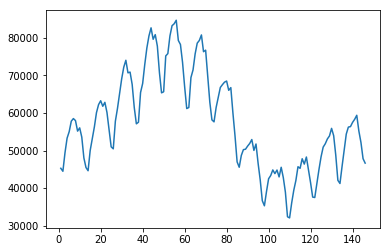

In [26]:
# first look
plt.plot(df.Month, df['Private Construction'])

Initial impressions:

- nonlinear, almost sinusoidal overall trend. data only gives us a single period though
- clear cyclicality - seems to be same pattern as in the public construction dataset
- cycle amplitude decreases slightly over time

The same approach we used for analysis of public sector construction spending should work for this dataset, too.

In [27]:
dfpriv = df.drop(['Total Construction','Public Construction'], axis=1)
dfpriv.head()

,Month,Month-Year,Private Construction
0,1,Jan-02,45273
1,2,Feb-02,44475
2,3,Mar-02,49396
3,4,Apr-02,53283
4,5,May-02,55009


### 1. Finding the Trend Line

In [29]:
def sqErr(row):
    return (row['Private Construction'] - row['MovAvg'])**2

# initializing new columns
dfpriv['MovAvg'] = np.NaN
dfpriv['sqErr'] = np.NaN

# converting df index to date format
dfpriv.index = pd.date_range(freq='M', start=pd.Timestamp(year=2002, month=1, day=1), periods=len(dfpriv['Private Construction']))
dfpriv.head()

,Month,Month-Year,Private Construction,MovAvg,sqErr
2002-01-31,1,Jan-02,45273,NaN,NaN
2002-02-28,2,Feb-02,44475,NaN,NaN
2002-03-31,3,Mar-02,49396,NaN,NaN
2002-04-30,4,Apr-02,53283,NaN,NaN
2002-05-31,5,May-02,55009,NaN,NaN


Average Squared Error per Month:  37314824.93608569
            Month Month-Year  Private Construction        MovAvg         sqErr
2003-07-31     19     Jul-03                 62216  57969.430556  1.803335e+07
2003-08-31     20     Aug-03                 63234  58314.944444  2.419711e+07
2003-09-30     21     Sep-03                 61767  58718.902778  9.290897e+06
2003-10-31     22     Oct-03                 62813  59143.555556  1.346482e+07
2003-11-30     23     Nov-03                 60115  59593.541667  2.719188e+05
2003-12-31     24     Dec-03                 55584  60111.736111  2.050039e+07
2004-01-31     25     Jan-04                 50975  60430.750000  8.941121e+07
2004-02-29     26     Feb-04                 50449  61294.125000  1.176167e+08
2004-03-31     27     Mar-04                 57796  62113.375000  1.863973e+07
2004-04-30     28     Apr-04                 61177  62819.125000  2.696575e+06
2004-05-31     29     May-04                 65027  63465.500000  2.438282e+06


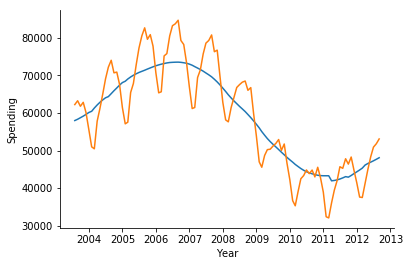

In [35]:
window = 36
window = window - window % 2

# loop computing the moving average
for i in range(int(window/2),dfpriv.shape[0]-int(window/2)):
    dfpriv.loc[dfpriv.index[i],'MovAvg'] = (0.5*dfpriv.iloc[i - int(window/2)]['Private Construction'] + dfpriv.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*dfpriv.iloc[i + int(window/2)]['Private Construction'])/float(window)

dfpriv['sqErr'] = (dfpriv['Private Construction'] - dfpriv['MovAvg'])**2

# removing rows outside of window
dfpriv.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(dfpriv['MovAvg'],label='Moving Avg.')
ax.plot(dfpriv['Private Construction'],label='Private Construction Spending')
ax.set_xlabel('Year')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(dfpriv['sqErr'])/len(dfpriv))
print(dfpriv)

In [36]:
dfpriv['R1'] = dfpriv['Private Construction'] - dfpriv['MovAvg']
dfpriv['R1Error'] = abs((dfpriv['Private Construction'] - dfpriv['R1'])/dfpriv['Private Construction'])
dfpriv.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Month-Year,Private Construction,MovAvg,sqErr,R1,R1Error
2003-07-31 00:00:00,19,Jul-03,62216,57969.4,"18,033,352.0","4,246.6",0.932
2003-08-31 00:00:00,20,Aug-03,63234,58314.9,"24,197,107.6","4,919.1",0.922
2003-09-30 00:00:00,21,Sep-03,61767,58718.9,"9,290,896.7","3,048.1",0.951
2003-10-31 00:00:00,22,Oct-03,62813,59143.6,"13,464,822.5","3,669.4",0.942
2003-11-30 00:00:00,23,Nov-03,60115,59593.5,"271,918.8",521.5,0.991
2003-12-31 00:00:00,24,Dec-03,55584,60111.7,"20,500,394.3","-4,527.7",1.081
2004-01-31 00:00:00,25,Jan-04,50975,60430.8,"89,411,208.1","-9,455.8",1.185
2004-02-29 00:00:00,26,Feb-04,50449,61294.1,"117,616,736.3","-10,845.1",1.215
2004-03-31 00:00:00,27,Mar-04,57796,62113.4,"18,639,726.9","-4,317.4",1.075
2004-04-30 00:00:00,28,Apr-04,61177,62819.1,"2,696,574.5","-1,642.1",1.027


Average Residual:  229.80151515151488


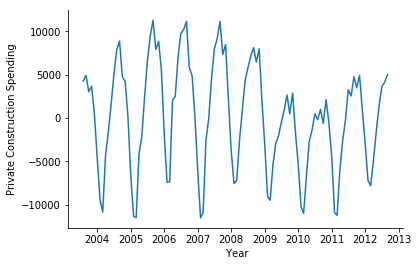

In [37]:
fig,ax = plt.subplots()
ax.plot(dfpriv['R1'])
ax.set_xlabel(' Year')
ax.set_ylabel('Private Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(dfpriv['R1'])/len(dfpriv))

### Looking at cyclicality/autocorrelation analysis

In [38]:
maxCorr = 0.0
period = np.NaN
for i in range(1,20):
    corr = dfpriv['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.823314317565623
Correlation, lag  2     0.47638483867139064
Correlation, lag  3     0.05699103767915631
Correlation, lag  4     -0.30611486248958564
Correlation, lag  5     -0.5536604775202971
Correlation, lag  6     -0.6668714974339647
Correlation, lag  7     -0.5673683275150679
Correlation, lag  8     -0.33625273361743335
Correlation, lag  9     0.0053055223314178715
Correlation, lag  10     0.40051355463766236
Correlation, lag  11     0.7257929777744464
Correlation, lag  12     0.8908351853400349
Correlation, lag  13     0.7271004026657907
Correlation, lag  14     0.40033167136449843
Correlation, lag  15     -0.006030895758340482
Correlation, lag  16     -0.3546394849746984
Correlation, lag  17     -0.5889418968935354
Correlation, lag  18     -0.6967075757356529
Correlation, lag  19     -0.6053782524293619
period =  12      Maximum Correlation =  0.8908351853400349


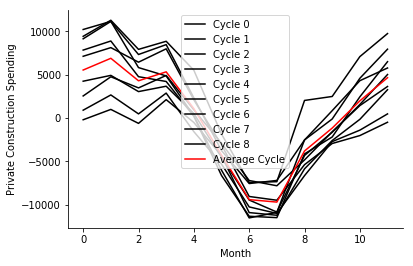

In [39]:
# as with the public sector construction data, the period size is 12. correlation is weaker here, though.
period = 12
cycleLen = period
numCycles = int(len(dfpriv)/cycleLen + 0.5)
cycles = [dfpriv.iloc[range(i*period,min((i+1)*period,len(dfpriv)))]['R1'] for i in range(numCycles)]
ptsInCycles = [dfpriv.iloc[range(i,len(dfpriv['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Private Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

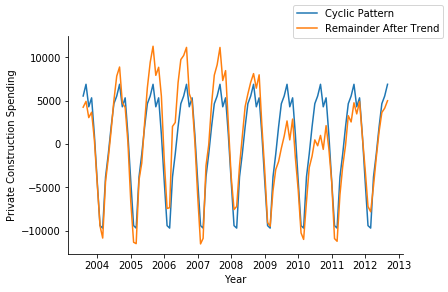

In [40]:
cycleLen = period
numCycles = int(len(dfpriv)/cycleLen + 0.5)
dfpriv['C'] = np.NaN   # initializes cyclicality component
for i in range(len(dfpriv)):
    dfpriv.loc[dfpriv.index[i], 'C'] = avg[i % cycleLen]

fig,ax = plt.subplots()
ax.plot(dfpriv['C'],label='Cyclic Pattern')
ax.plot(dfpriv['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Private Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

The fit isn't quite as clean as it was for the previous dataset, but it looks pretty close.

### Final Model/Calculating Error

In [41]:
dfpriv['R2Private'] = dfpriv['R1'] - dfpriv['C']
dfpriv['sqErr'] = dfpriv['R2Private'] ** 2
dfpriv['R2ErrorPrivate'] = abs(dfpriv['R2Private']/dfpriv['Private Construction'])
dfpriv['fit'] = dfpriv['MovAvg'] + dfpriv['C']
print('Average Error (Relative): ', sum(dfpriv['R2ErrorPrivate'])/len(dfpriv))
print('Cumulative Squared Error ', sum(dfpriv['sqErr']))
pd.set_option('display.width', 200)
print(dfpriv[['Month-Year','MovAvg', 'C', 'fit', 'Private Construction', 'R2Private', 'sqErr', 'R2ErrorPrivate']])

Average Error (Relative):  0.03652689402460155
Cumulative Squared Error  712192316.4571943
           Month-Year        MovAvg            C           fit  Private Construction    R2Private         sqErr  R2ErrorPrivate
2003-07-31     Jul-03  57969.430556  5535.538194  63504.968750                 62216 -1288.968750  1.661440e+06        0.020718
2003-08-31     Aug-03  58314.944444  6888.856250  65203.800694                 63234 -1969.800694  3.880115e+06        0.031151
2003-09-30     Sep-03  58718.902778  4294.733796  63013.636574                 61767 -1246.636574  1.554103e+06        0.020183
2003-10-31     Oct-03  59143.555556  5327.019290  64470.574846                 62813 -1657.574846  2.747554e+06        0.026389
2003-11-30     Nov-03  59593.541667  1085.786265  60679.327932                 60115  -564.327932  3.184660e+05        0.009387
2003-12-31     Dec-03  60111.736111 -4272.506173  55839.229938                 55584  -255.229938  6.514232e+04        0.004592
2004-01-31   

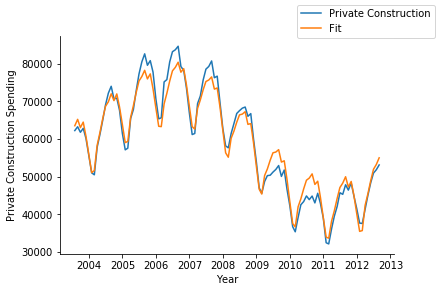

In [42]:
fig,ax = plt.subplots()
ax.plot(dfpriv['Private Construction'],label='Private Construction')
ax.plot(dfpriv['fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Private Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()